# Comparisons of python and C++ implementations of the Kalman Filter class applied to the 1D trajectory problem

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Eventually, we want to set the parameters of the physical model and the Kalman filter from this file, then
# be able to run the Kalman filter using python, and the compiled C++ code, with exactly the same parameters 
# and measurements.

# For now, I will do things manually to see if the Kalman filter from python and c++ give the same results.


In [8]:
# import the Kalman filter class
from kalman_python import kf

In [9]:
# Load the cpp implementation data, since we need to use the same measurements
cpp_data = pd.read_csv('../build/bin/kalman_output.csv')

cpp_data.head()

# save measurements in a list

,time,true,measurement,prediction,update
0,0.0,0.000000,-6.19868,0.000000,-2.302960
1,0.1,0.995095,-1.04226,-2.522130,-1.658630
2,0.2,1.980380,10.04040,-1.815650,0.846889
3,0.3,2.955860,4.95471,0.884868,1.555890
4,0.4,3.921520,10.83550,1.631990,2.986880


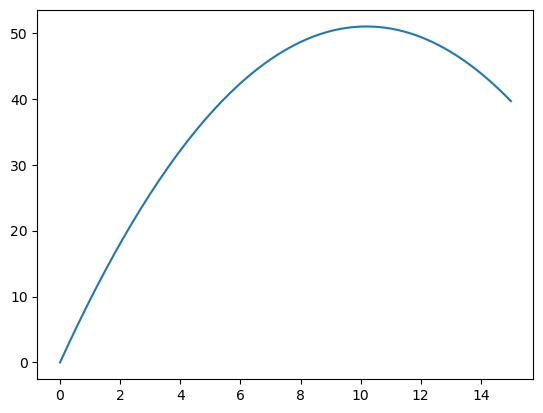

In [10]:
# plot the true dynamics 
plt.plot(cpp_data['time'], cpp_data['true'])

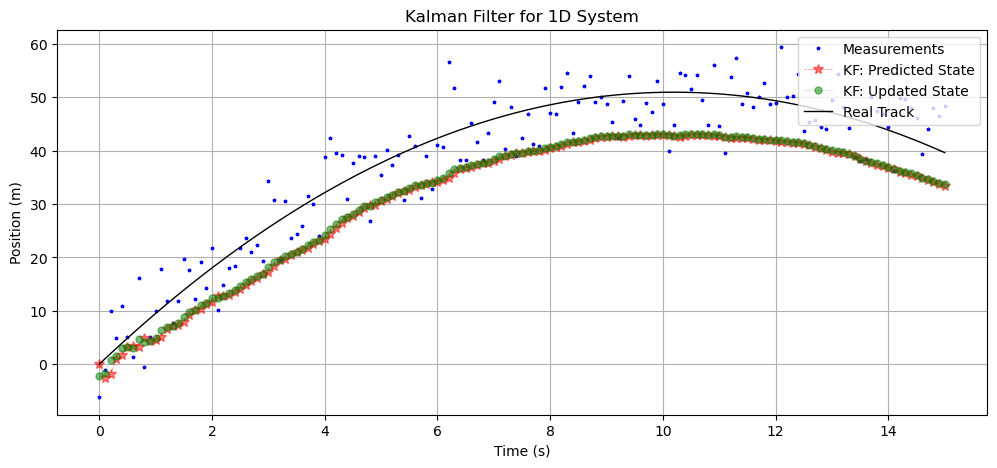

In [11]:
# plot the cpp filter results

# plot the results
fig = plt.figure(figsize=(12, 5))

plt.plot(cpp_data['time'], cpp_data['measurement'], '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)
plt.plot(cpp_data['time'], cpp_data['prediction'],'*--', label='KF: Predicted State',  color='r', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], cpp_data['update'], 'o:', label='KF: Updated State',  color='g', markersize=5, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], cpp_data['true'], label='Real Track', color='black', linewidth=1)

plt.legend(loc='upper right')
plt.title('Kalman Filter for 1D System')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.show()

# Python implementation

In [12]:
# load the physical and model parameters from the cpp output

import pandas as pd

df = pd.read_csv("../build/bin/kalman_params.csv")
params = dict(zip(df['name'], df['value']))

# set the parameters of the Kalman filter
dt = params["dt"]
t_final = params["t_final"]
a = params["a"]
v_i = params["v_i"]
var_x = params["var_x"]
var_v = params["var_v"]
cov_xv = params["cov_xv"]

# define the time list
time = np.arange(0, t_final, dt)


In [13]:
# run the Kalman filter in python with the same parameters as in the cpp implementation
kalman = kf(dt, var_x, var_v, cov_xv, a) # create an instance of the kalman filter class

measurements = [] # empty list to store measurements at each time step
predictions = [] # empty list to store predicted states at each time step  
updates = [] # empty list to store updated states at each time step

# loop through the position values of the trajectory (one at each time step)
for i, x in enumerate(cpp_data['true']):
    
    x_pred = kalman.predictions().item(0) # extract the predicted position from the state vector
    predictions.append(x_pred) # save the prediction

    # take measurement and save the result
    # measurement = x + np.random.normal(0, 3) # add Gaussian noise to the true position to mimick measurements
    
    # pick out measurement from the cpp data
    measurement = cpp_data['measurement'].iloc[i] # get the measurement from the cpp data
    measurements.append(measurement) # save the measurement
    
    # update the prediction with the measurement
    x_update = kalman.updates(measurement).item(0) # extract the updated position from the state vector
    updates.append(x_update) # save the update
    

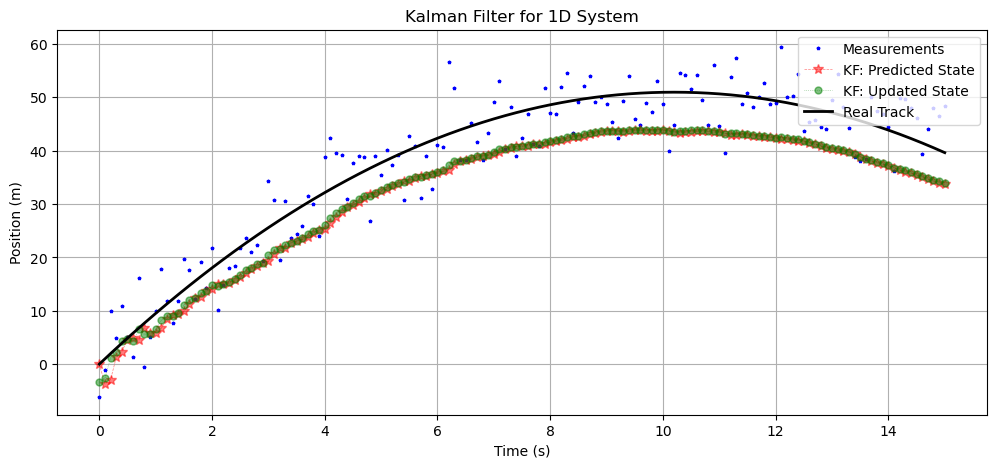

In [14]:
# plot the results
fig = plt.figure(figsize=(12, 5))

plt.plot(cpp_data['time'], measurements, '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)
plt.plot(cpp_data['time'], predictions,'*--', label='KF: Predicted State',  color='r', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], updates, 'o:', label='KF: Updated State',  color='g', markersize=5, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], cpp_data['true'], label='Real Track', color='black', linewidth=2)

plt.legend(loc='upper right')
plt.title('Kalman Filter for 1D System')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid()
plt.show()

# Compare python and cpp implementations

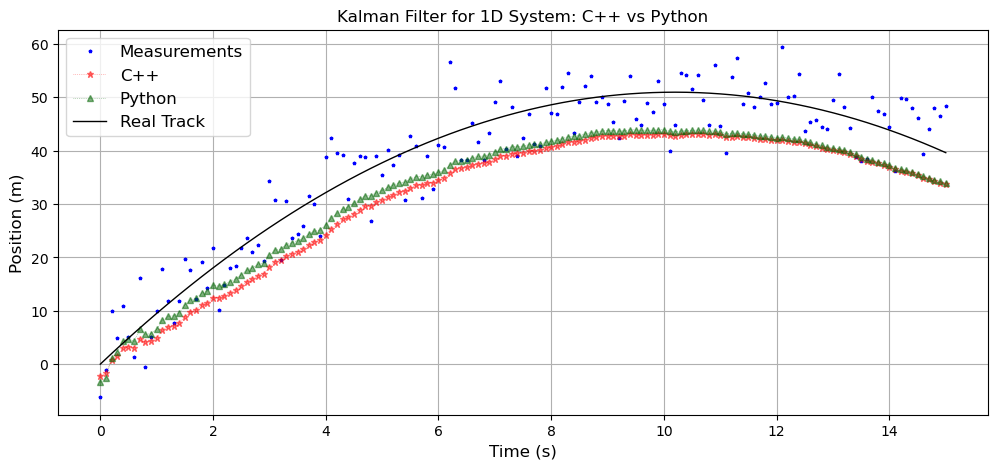

In [65]:
# plot the cpp filter results

# plot the results
fig = plt.figure(figsize=(12, 5))
fnt=12
plt.plot(cpp_data['time'], cpp_data['measurement'], '*', markersize=2.5, label='Measurements', color='b', linewidth=0.5)

# C++
# plt.plot(cpp_data['time'], cpp_data['prediction'],'o--', label='C++: Predicted State',  color='r', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], cpp_data['update'], '*:', label='C++',  color='r', markersize=5, linewidth=0.5, alpha=0.5)

# python
# plt.plot(cpp_data['time'], predictions,'s--', label='Python: Predicted State',  color='darkred', markersize=7, linewidth=0.5, alpha=0.5)
plt.plot(cpp_data['time'], updates, '^:', label='Python',  color='darkgreen', markersize=5, linewidth=0.5, alpha=0.5)

plt.plot(cpp_data['time'], cpp_data['true'], label='Real Track', color='black', linewidth=1)
plt.legend(loc='best', fontsize=fnt)
plt.title('Kalman Filter for 1D System: C++ vs Python')
plt.xlabel('Time (s)', fontsize=fnt)
plt.ylabel('Position (m)', fontsize=fnt)
plt.grid()
plt.show()



plt.show()